In [3]:
from src.DeepRock.models import AdvSeg
from src.DeepRock.data import DataGenerator
from src.DeepRock.utils import split_trn_vld_tst, test_fn, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
test_path = './data/test/'
sag_dtype = 'sent_ast_geo'
sa_dtype = 'sent_ast'
s_dtype = 'sent'

#### start to build Conv2D for different input data

In [3]:
conv = AdvSeg(dtype=sag_dtype)
# sa_conv = AdvSeg(dtype=sa_dtype)
# sag_conv = AdvSeg(dtype=sag_dtype)
conv.build_SegmentationNet()
# sa_conv.build_SegmentationNet()
# sag_conv.build_SegmentationNet()

building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...


##### plot the ground truth

In [6]:
# convert the ground truth into a big block
block_id = 1
ids = sorted(glob.glob('./data/block{0}/test/Y/*.npy'.format(block_id)), key=lambda f: int(''.join(filter(str.isdigit, f))))
count = 0
track = []
for i in range(5):
    tmp1 = []
    for j in range(5):
        tmp1.append(np.argmax(np.load(ids[count]), axis=0))
        count += 1
    track.append(np.concatenate(tmp1, axis=1))
out = np.concatenate(track, axis=0)
np.save('./data/block{0}/Y.npy'.format(block_id), out)

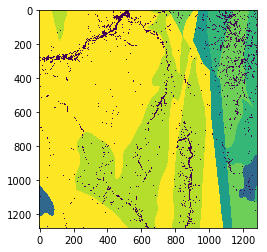

In [7]:
plt.imshow(out)

##### load weights and predicts

In [ ]:
conv.load_weights('./Segmentation/sent_ast_geo/weights-59-0.50.hdf5')

#### test

In [9]:
X_id = sorted(glob.glob('./data/block{0}/test/X/*.npy'.format(block_id)), key=lambda f: int(''.join(filter(str.isdigit, f))))
X = [np.transpose(np.load(file), [1,2,0]) for file in X_id]
preds = conv.predict(np.stack(X))

In [10]:
count = 0
track = []
for i in range(5):
    tmp1 = []
    for j in range(5):
        tmp1.append(np.argmax(preds[count,:,:,:], axis=2))
        count += 1
    track.append(np.concatenate(tmp1, axis=1))
p = np.concatenate(track, axis=0)
np.save('./data/block1/preds.npy', p)

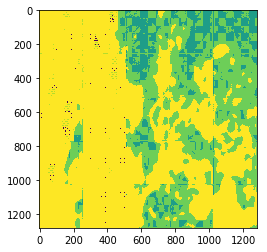

In [12]:
plt.imshow(p)

In [11]:
from sklearn import metrics

In [18]:
cm = metrics.confusion_matrix(out.flatten(), p.flatten(), np.arange(10))

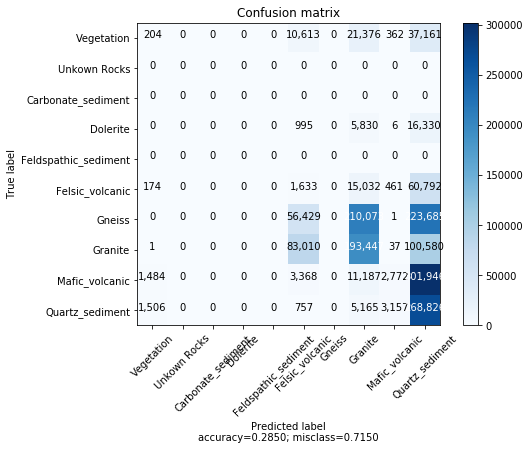

In [19]:
plot_confusion_matrix(cm, ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment'], 
                     normalize=False)

#### calculate the accuracy

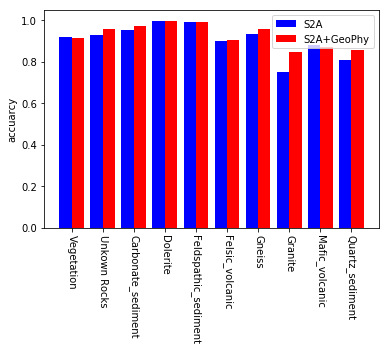

In [126]:
cls_names = ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment']
ax = plt.subplot(111)
ax.bar(np.arange(10)-0.2, acc_cls, width=0.4, color='b', align='center', label='S2A')
ax.bar(np.arange(10)+0.2, acc_cls_sg, width=0.4, color='r', align='center', label='S2A+GeoPhy')
plt.xticks(np.arange(10), cls_names, rotation=270)
plt.ylabel('accuarcy')
plt.legend()